<a href="https://colab.research.google.com/github/CyberBantu/Analise_1746_Dados_Marginais/blob/main/Analise_1746.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import basedosdados as bd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Para carregar o dado direto no pandas
df = bd.read_sql ( "SELECT * FROM `datario.administracao_servicos_publicos.chamado_1746` where EXTRACT(YEAR FROM data_inicio) = 2022" , billing_project_id = "analise-1746" )

Downloading: 100%|██████████| 657493/657493 [03:23<00:00, 3226.41rows/s]


In [11]:
# Olhando para o tamanho do DF
df.head()

,id_chamado,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,...,data_real_diagnostico,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao
0,17878095,2022-11-05 21:55:29,NaT,144,5,4804,20,8,RIOLUZ - Companhia Municipal de Energia e Ilum...,RIOLUZ - Companhia Municipal de Energia e Ilum...,...,NaT,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2022-11-01
1,17871884,2022-11-03 18:45:06,NaT,89,3,24877,1021,8,RIOLUZ - Companhia Municipal de Energia e Ilum...,RIOLUZ - Companhia Municipal de Energia e Ilum...,...,NaT,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2022-11-01
2,17876971,2022-11-05 12:06:45,NaT,141,5,165761,80,8,RIOLUZ - Companhia Municipal de Energia e Ilum...,RIOLUZ - Companhia Municipal de Energia e Ilum...,...,NaT,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2022-11-01
3,17871519,2022-11-03 17:15:42,NaT,144,5,27706,406,8,RIOLUZ - Companhia Municipal de Energia e Ilum...,RIOLUZ - Companhia Municipal de Energia e Ilum...,...,NaT,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2022-11-01
4,17875952,2022-11-04 20:38:16,NaT,148,5,454389,<NA>,8,RIOLUZ - Companhia Municipal de Energia e Ilum...,RIOLUZ - Companhia Municipal de Energia e Ilum...,...,NaT,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2022-11-01


* Qual foram os Bairros com maior Numero de Chamados

In [28]:
ocorrenias_bairro = df['id_bairro'].value_counts().reset_index().rename( columns = {'index': 'id_bairro',
                                                        'id_bairro':'ocorrencias'})

In [26]:
# Coletando dados de Bairros diretamente do Data_rio
bairros = bd.read_sql ( "SELECT * FROM `datario.dados_mestres.bairro` LIMIT 1000" , billing_project_id = "analise-1746" )
bairros

Downloading: 100%|██████████| 164/164 [00:02<00:00, 56.44rows/s]


,id_bairro,nome,id_area_planejamento,id_regiao_planejamento,nome_regiao_planejamento,id_regiao_administrativa,nome_regiao_administrativa,subprefeitura,area,perimetro,geometria_wkt,geometria
0,2,Gamboa,1,1.1,Centro,1,PORTUARIA,Centro,1.112903e+06,4612.827414,POLYGON ((-43.18787320828573 -22.8931089710106...,"POLYGON((-43.1878732082857 -22.8931089710107, ..."
1,1,Saúde,1,1.1,Centro,1,PORTUARIA,Centro,3.638176e+05,2646.216986,POLYGON ((-43.181109755485245 -22.895417528115...,"POLYGON((-43.1811097554853 -22.8954175281158, ..."
2,3,Santo Cristo,1,1.1,Centro,1,PORTUARIA,Centro,1.684721e+06,6743.218804,POLYGON ((-43.19445618134857 -22.9033652388182...,"POLYGON((-43.1944561813486 -22.9033652388182, ..."
3,4,Caju,1,1.1,Centro,1,PORTUARIA,Centro,5.347481e+06,19800.495942,MULTIPOLYGON (((-43.22518208553896 -22.8746396...,None
4,5,Centro,1,1.1,Centro,2,CENTRO,Centro,5.424739e+06,22846.214306,MULTIPOLYGON (((-43.178288869275505 -22.892566...,MULTIPOLYGON(((-43.1657633602567 -22.897028697...
...,...,...,...,...,...,...,...,...,...,...,...,...
159,148,Paciência,5,5.3,Santa Cruz,19,SANTA CRUZ,Zona Oeste,2.741797e+07,34307.566163,POLYGON ((-43.62499898345479 -22.8623449433100...,"POLYGON((-43.6249989834548 -22.8623449433101, ..."
160,153,Pedra de Guaratiba,5,5.4,Guaratiba,26,GUARATIBA,Zona Oeste,3.636912e+06,8804.324256,POLYGON ((-43.62693396196009 -22.9995892028312...,"POLYGON((-43.6269339619601 -22.9995892028312, ..."
161,152,Barra de Guaratiba,5,5.4,Guaratiba,26,GUARATIBA,Zona Oeste,9.442030e+06,27508.187189,MULTIPOLYGON (((-43.52203014555159 -23.0078000...,MULTIPOLYGON(((-43.568815318978 -23.0814917049...
162,164,Ilha de Guaratiba,5,5.4,Guaratiba,26,GUARATIBA,Zona Oeste,7.714616e+06,13955.118464,POLYGON ((-43.570901967515084 -22.984664654518...,"POLYGON((-43.5709019675151 -22.9846646545183, ..."


In [27]:
bairros = bairros[['id_bairro', 'nome', 'nome_regiao_administrativa', 'subprefeitura']]
bairros

,id_bairro,nome,nome_regiao_administrativa,subprefeitura
0,2,Gamboa,PORTUARIA,Centro
1,1,Saúde,PORTUARIA,Centro
2,3,Santo Cristo,PORTUARIA,Centro
3,4,Caju,PORTUARIA,Centro
4,5,Centro,CENTRO,Centro
...,...,...,...,...
159,148,Paciência,SANTA CRUZ,Zona Oeste
160,153,Pedra de Guaratiba,GUARATIBA,Zona Oeste
161,152,Barra de Guaratiba,GUARATIBA,Zona Oeste
162,164,Ilha de Guaratiba,GUARATIBA,Zona Oeste


##### Juntando os dados do 1746 com os dados de ID de Bairros

In [35]:
bairros_ocorrencias = ocorrenias_bairro.merge(bairros, on='id_bairro')
top_10_bairros_ocorrências = bairros_ocorrencias.head(10)
top_10_bairros_ocorrências_menos = bairros_ocorrencias.tail(10)

In [36]:
# Plotando grafico
top_10_bairros_ocorrências

,id_bairro,ocorrencias,nome,nome_regiao_administrativa,subprefeitura
0,144,45963,Campo Grande,CAMPO GRANDE,Zona Oeste
1,33,22989,Tijuca,TIJUCA,Grande Tijuca
2,128,20294,Barra da Tijuca,BARRA DA TIJUCA,Barra Da Tijuca
3,24,19803,Copacabana,COPACABANA,Zona Sul
4,141,17814,Bangu,BANGU,Zona Oeste
5,149,15624,Santa Cruz,SANTA CRUZ,Zona Oeste
6,139,15204,Realengo,REALENGO,Zona Oeste
7,5,15115,Centro,CENTRO,Centro
8,122,15094,Taquara,JACAREPAGUA,Jacarepaguá
9,132,14544,Recreio dos Bandeirantes,BARRA DA TIJUCA,Barra Da Tijuca


Text(0.5, 1.0, 'Total de Chamados no 1746 no Ano de 2022 por Bairros')

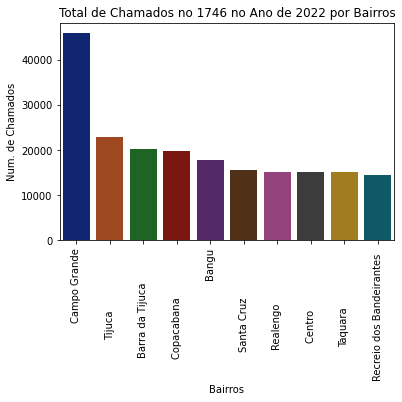

In [42]:
# Top 10
sns.barplot( data=top_10_bairros_ocorrências, x="nome", y="ocorrencias",
            palette = 'dark')
plt.xticks(rotation = 90)
plt.xlabel('Bairros')
plt.ylabel('Num. de Chamados')
plt.title('Total de Chamados no 1746 no Ano de 2022 por Bairros')

Text(0.5, 1.0, 'Total de Chamados no 1746 no Ano de 2022 nos Bairros com Menos Chamados')

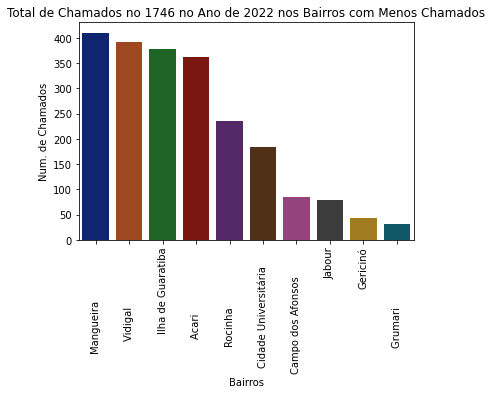

In [46]:
# Bairros com Menos Chamados
ax = sns.barplot( data=top_10_bairros_ocorrências_menos, x="nome", y="ocorrencias",
            palette = 'dark')
plt.xticks(rotation = 90)
plt.xlabel('Bairros')
plt.ylabel('Num. de Chamados')
plt.title('Total de Chamados no 1746 no Ano de 2022 nos Bairros com Menos Chamados')

In [49]:
# Criando porcentagem para total de chamados por bairros
total_chamados = bairros_ocorrencias['ocorrencias'].sum()
bairros_ocorrencias['porcentagem'] = round(bairros_ocorrencias['ocorrencias'] / total_chamados*100,2)
bairros_ocorrencias.head()

,id_bairro,ocorrencias,nome,nome_regiao_administrativa,subprefeitura,porcentagem
0,144,45963,Campo Grande,CAMPO GRANDE,Zona Oeste,7.17
1,33,22989,Tijuca,TIJUCA,Grande Tijuca,3.59
2,128,20294,Barra da Tijuca,BARRA DA TIJUCA,Barra Da Tijuca,3.17
3,24,19803,Copacabana,COPACABANA,Zona Sul,3.09
4,141,17814,Bangu,BANGU,Zona Oeste,2.78


In [50]:
bairros_ocorrencias['ocorrencias'].sum()

641119

* Criando Visualização de porcentagem por subprefeitura

In [53]:
subpref_porc = bairros_ocorrencias.groupby(['subprefeitura'])['porcentagem'].sum().reset_index().sort_values(by = 'porcentagem', ascending = False)
subpref_porc

,subprefeitura,porcentagem
5,Zona Norte,33.42
6,Zona Oeste,23.87
7,Zona Sul,12.62
4,Jacarepaguá,9.87
0,Barra Da Tijuca,6.71
1,Centro,6.03
2,Grande Tijuca,4.03
3,Ilhas,3.43


Text(0.9, 0, 'Produzido por Christian')

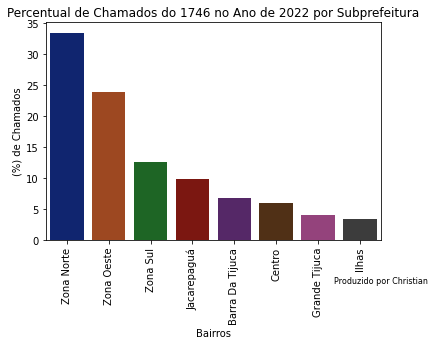

In [65]:
ax = sns.barplot( data=subpref_porc, x="subprefeitura", y="porcentagem",
            palette = 'dark')
plt.xticks(rotation = 90)
plt.xlabel('Bairros')
plt.ylabel('(%) de Chamados')
plt.title('Percentual de Chamados do 1746 no Ano de 2022 por Subprefeitura')
plt.suptitle('Produzido por Christian', x = 0.9, y = 0, size = 8)

As subprefeituras da Znas Norte, Oeste e Sul são as que mais recebem ocorrências no Rio de Janeiro, **sendo a Zona Norte Responsavel por mais de 1/3 das ocorrências no Ano**

* Visualização de Porcentagem por Região Administrativa

In [67]:
regiao_porc = bairros_ocorrencias.groupby(['nome_regiao_administrativa'])['porcentagem'].sum().reset_index().sort_values(by = 'porcentagem', ascending = False)


In [70]:
# Filtrando as 10 com maiores ocorrências
regiao_porc_top_10= regiao_porc.head(10)

Text(0.5, 1.0, 'Percentual de Chamados do 1746 no Ano de 2022 por Subprefeitura')

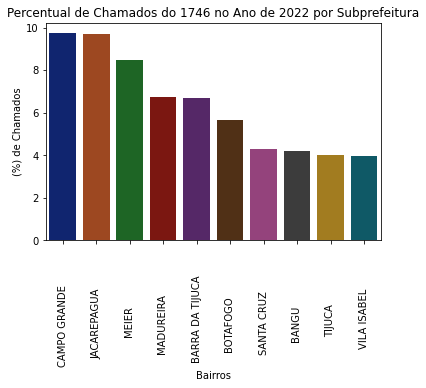

In [72]:
ax = sns.barplot( data=regiao_porc_top_10, x="nome_regiao_administrativa", y="porcentagem",
            palette = 'dark')
plt.xticks(rotation = 90)
plt.xlabel('Bairros')
plt.ylabel('(%) de Chamados')
plt.title('Percentual de Chamados do 1746 no Ano de 2022 por Subprefeitura')
#plt.suptitle('Produzido por Christian', x = 0.9, y = 0, size = 8)

##### Observando os dados por Organização

In [78]:
ocorr_organizacao = df['nome_unidade_organizacional'].value_counts().reset_index().rename(columns = {'index':'Organização',
                                                                                 'nome_unidade_organizacional':'Ocorrencias'})
ocorr_organizacao

,Organização,Ocorrencias
0,COMLURB - Companhia Municipal de Limpeza Urbana,188040
1,GM-RIO - Guarda Municipal do Rio de Janeiro,135210
2,RIOLUZ - Companhia Municipal de Energia e Ilum...,107172
3,GMA - Gerência de Manutenção Semafórica,17728
4,DEFESA CIVIL - Subsecretaria de Proteção e Def...,13894
...,...,...
330,DEP - Diretoria de Estudos e Projetos,1
331,CTRT/AP 3.3 - Coordenadoria Técnica Regional d...,1
332,SOD - Subgerência Operacional de Dengue,1
333,Conselho Tutelar 16,1


In [81]:
top_10_organizacao = ocorr_organizacao.head(15)
top_10_organizacao

,Organização,Ocorrencias
0,COMLURB - Companhia Municipal de Limpeza Urbana,188040
1,GM-RIO - Guarda Municipal do Rio de Janeiro,135210
2,RIOLUZ - Companhia Municipal de Energia e Ilum...,107172
3,GMA - Gerência de Manutenção Semafórica,17728
4,DEFESA CIVIL - Subsecretaria de Proteção e Def...,13894
5,TR/SUBOP/CFT - Coordenadoria de Fiscalização e...,11742
6,CLF - Coordenadoria de Licenciamento e Fiscali...,10679
7,21aGC,10573
8,SUBPSE,7778
9,GFER - Gerência de Fiscalização de Estacioname...,6280


In [82]:
import plotly.express as px

In [88]:
px.bar(top_10_organizacao, x = 'Organização', y = 'Ocorrencias', title = 'Organizações com maior Numero de Chamados no 1746 em 2022')

* **Comlurb, Guarda Municipal e Rio Luz são as organizações que mais recebem chamados, com um total de 188, 135, 107 mil, respectivalmente.**

###### Olhando para prazos por Bairros

In [95]:
prazo = df[['id_bairro','dentro_prazo']]

In [97]:
bairro_prazo = prazo.merge(bairros, on='id_bairro')
bairro_prazo

,id_bairro,dentro_prazo,nome,nome_regiao_administrativa,subprefeitura
0,144,Fora do prazo,Campo Grande,CAMPO GRANDE,Zona Oeste
1,144,Fora do prazo,Campo Grande,CAMPO GRANDE,Zona Oeste
2,144,Fora do prazo,Campo Grande,CAMPO GRANDE,Zona Oeste
3,144,Fora do prazo,Campo Grande,CAMPO GRANDE,Zona Oeste
4,144,Fora do prazo,Campo Grande,CAMPO GRANDE,Zona Oeste
...,...,...,...,...,...
641114,163,Fora do prazo,Jabour,BANGU,Zona Oeste
641115,163,Fora do prazo,Jabour,BANGU,Zona Oeste
641116,163,No prazo,Jabour,BANGU,Zona Oeste
641117,163,Fora do prazo,Jabour,BANGU,Zona Oeste


In [111]:
agrup_prazo = bairro_prazo.value_counts().reset_index().rename(columns = {0 : 'chamados'}).sort_values(by = 'chamados', ascending = False)
agrup_prazo

,id_bairro,dentro_prazo,nome,nome_regiao_administrativa,subprefeitura,chamados
0,144,No prazo,Campo Grande,CAMPO GRANDE,Zona Oeste,27412
1,144,Fora do prazo,Campo Grande,CAMPO GRANDE,Zona Oeste,18551
2,33,No prazo,Tijuca,TIJUCA,Grande Tijuca,15448
3,128,No prazo,Barra da Tijuca,BARRA DA TIJUCA,Barra Da Tijuca,14826
4,24,No prazo,Copacabana,COPACABANA,Zona Sul,14265
...,...,...,...,...,...,...
323,136,Fora do prazo,Campo dos Afonsos,REALENGO,Zona Oeste,33
324,160,No prazo,Gericinó,BANGU,Zona Oeste,24
325,160,Fora do prazo,Gericinó,BANGU,Zona Oeste,19
326,133,No prazo,Grumari,BARRA DA TIJUCA,Barra Da Tijuca,17


In [113]:
agrup_prazo['porc'] = agrup_prazo['chamados'] / agrup_prazo['chamados'].sum()*100
agrup_prazo.groupby(['dentro_prazo'])['porc'].sum()

dentro_prazo
Fora do prazo    33.067652
No prazo         66.932348
Name: porc, dtype: float64

*  **66,9%** das Ocorrências abertas em 2022 estão dentro do Prazo

In [118]:
prazo_subpref = agrup_prazo.groupby(['dentro_prazo','subprefeitura'])['porc'].sum().reset_index()

In [121]:
px.bar(prazo_subpref, x="subprefeitura", y='porc', color = 'dentro_prazo',title="Wide-Form Input")